# Movie Data Analysis Project

In [141]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [91]:
df = pd.read_csv("mymoviedb.csv" , lineterminator ='\n')
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [93]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [94]:
df['Genre'].unique()

array(['Action, Adventure, Science Fiction', 'Crime, Mystery, Thriller',
       'Thriller', ..., 'Comedy, TV Movie, Romance',
       'Science Fiction, Fantasy, Family, Music',
       'War, Drama, Science Fiction'], dtype=object)

In [95]:
df.duplicated().sum()

np.int64(0)

In [97]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# . Exploration Summary

# . We have a dataframe consisting of 9827 rows and 9 columns.

# . Our dataset looks a bit tidy with no NaNs nor duplicated values.

# .Release Date column needs to be casted into date time and to extract only the Year Value.

# .  Overview and Poster Url wouldn't be so useful during analysis , so we'll drop them.

# . There is noticable outliers in Popularity column

# . Vote Average bettter be categorised for proper analysis.

# . Genre column has comma saperated values and white spaces, that needs to be hanndled and casted into ctegory 

# Data Cleaning

In [98]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])


# Casting Release_Date Column and extracing year Values 

In [99]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [100]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


# droping Overview and Poster_Url 

In [102]:
cols = {'Overview' , 'Poster_Url'}
df.drop(cols , axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Original_Language', 'Genre'],
      dtype='object')

In [103]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,en,Thriller
3,2021,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


# Categorizing Vote_Average Column 

We would cut the `Vote_Average` values and make 4 categories :  `Popular` ,  `Average` ,  `Below_avg` ,  `Not_popular` to desceibe it more using `catigorize_col()` function provided above

In [104]:
def categorize_col(df, col, labels):
    # Make a copy of original numeric column
    numeric_col = col + "_Numeric"
    df[numeric_col] = pd.to_numeric(df[col], errors='coerce')
    
    # Create bins based on quantiles
    edges = [
        df[numeric_col].min(),
        df[numeric_col].quantile(0.25),
        df[numeric_col].quantile(0.50),
        df[numeric_col].quantile(0.75),
        df[numeric_col].max()
    ]
    
    # New categorical column
    cat_col = col + "_Category"
    df[cat_col] = pd.cut(df[numeric_col], bins=edges, labels=labels, duplicates='drop')
    
    return df


In [105]:
labels = ['Not_popular', 'Below_avg', 'Average', 'Popular']
df = categorize_col(df, 'Vote_Average', labels)

# Now you have both:
print(df[['Title', 'Vote_Average_Numeric', 'Vote_Average_Category']].head())


df['Vote_Average'].unique()

                     Title  Vote_Average_Numeric Vote_Average_Category
0  Spider-Man: No Way Home                   8.3               Popular
1               The Batman                   8.1               Popular
2                  No Exit                   6.3             Below_avg
3                  Encanto                   7.7               Popular
4           The King's Man                   7.0               Average


array([ 8.3,  8.1,  6.3,  7.7,  7. ,  6.6,  6.8,  5.3,  7.2,  5.9,  7.3,
        7.1,  5.1,  4.6,  6. ,  8.2,  5.4,  6.1,  8.4,  6.9,  5.8,  7.4,
        7.8,  8. ,  6.2,  6.7,  7.6,  8.6,  4.8,  5.5,  7.9,  6.4,  7.5,
        5.7,  2.2,  6.5,  0. ,  5.6,  5.2,  5. ,  8.5,  3.5,  4. ,  3.3,
        4.7,  4.2,  4.3,  2. ,  4.1,  4.9,  8.7,  4.5,  9.1,  4.4,  3.6,
        2.8,  3.9,  3.8,  9. ,  3. ,  3.1,  3.7,  3.4,  8.9,  2.9,  8.8,
        3.2,  1.5,  9.2,  2.5,  1.8,  2.4,  2.6, 10. ])

In [106]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Vote_Average_Numeric,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",8.3,Popular
1,2022,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller",8.1,Popular
2,2022,No Exit,2618.087,122,6.3,en,Thriller,6.3,Below_avg
3,2021,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",7.7,Popular
4,2021,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",7.0,Average


In [110]:
df = df.drop(columns=['Vote_Average'])

In [111]:
df['Vote_Average_Category'].value_counts()

Vote_Average_Category
Not_popular    2467
Popular        2450
Average        2412
Below_avg      2398
Name: count, dtype: int64

In [112]:
df.isnull().sum()

Release_Date               0
Title                      0
Popularity                 0
Vote_Count                 0
Original_Language          0
Genre                      0
Vote_Average_Numeric       0
Vote_Average_Category    100
dtype: int64

In [113]:
df.dropna(inplace = True)

df.isna().sum()

Release_Date             0
Title                    0
Popularity               0
Vote_Count               0
Original_Language        0
Genre                    0
Vote_Average_Numeric     0
Vote_Average_Category    0
dtype: int64

In [114]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Original_Language,Genre,Vote_Average_Numeric,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,en,"Action, Adventure, Science Fiction",8.3,Popular
1,2022,The Batman,3827.658,1151,en,"Crime, Mystery, Thriller",8.1,Popular
2,2022,No Exit,2618.087,122,en,Thriller,6.3,Below_avg
3,2021,Encanto,2402.201,5076,en,"Animation, Comedy, Family, Fantasy",7.7,Popular
4,2021,The King's Man,1895.511,1793,en,"Action, Adventure, Thriller, War",7.0,Average


# we'd split genres into a list and then explode our dataframe to have only one genre per row for each moive 

In [115]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop=True)


In [116]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Original_Language,Genre,Vote_Average_Numeric,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,en,Action,8.3,Popular
1,2021,Spider-Man: No Way Home,5083.954,8940,en,Adventure,8.3,Popular
2,2021,Spider-Man: No Way Home,5083.954,8940,en,Science Fiction,8.3,Popular
3,2022,The Batman,3827.658,1151,en,Crime,8.1,Popular
4,2022,The Batman,3827.658,1151,en,Mystery,8.1,Popular


In [117]:
# casting column into category

df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes
                                 

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Release_Date           25552 non-null  int32   
 1   Title                  25552 non-null  object  
 2   Popularity             25552 non-null  float64 
 3   Vote_Count             25552 non-null  int64   
 4   Original_Language      25552 non-null  object  
 5   Genre                  25552 non-null  category
 6   Vote_Average_Numeric   25552 non-null  float64 
 7   Vote_Average_Category  25552 non-null  category
dtypes: category(2), float64(2), int32(1), int64(1), object(2)
memory usage: 1.1+ MB


In [119]:
df.nunique()

Release_Date              100
Title                    9415
Popularity               8088
Vote_Count               3265
Original_Language          42
Genre                      19
Vote_Average_Numeric       73
Vote_Average_Category       4
dtype: int64

In [120]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Original_Language,Genre,Vote_Average_Numeric,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,en,Action,8.3,Popular
1,2021,Spider-Man: No Way Home,5083.954,8940,en,Adventure,8.3,Popular
2,2021,Spider-Man: No Way Home,5083.954,8940,en,Science Fiction,8.3,Popular
3,2022,The Batman,3827.658,1151,en,Crime,8.1,Popular
4,2022,The Batman,3827.658,1151,en,Mystery,8.1,Popular


# Data visualization 

In [121]:
sns.set_style('whitegrid')

# 1) What is the most frequent genre of movies released on Netflix?


In [122]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

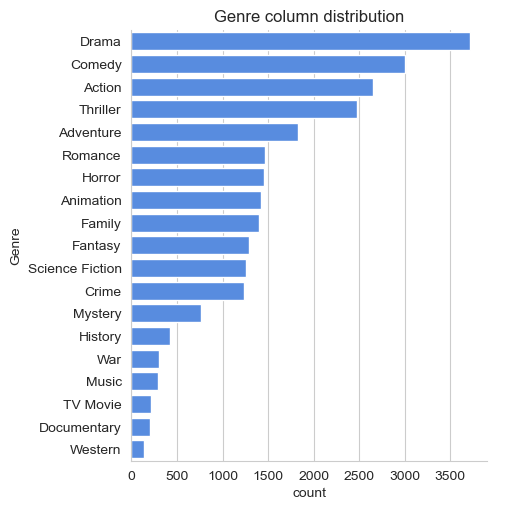

In [85]:
sns.catplot(y ='Genre' , data = df, kind = 'count' , order = df['Genre'].value_counts().index , color = '#4287f5')
plt.title('Genre column distribution')
plt.show()

# . we can notice from the above visual that Dram Genre is the most frequent Genre in our dataset and has appeared more than 14% of the among 19 other Genre


# 2) Which has highest votes in vote avg column?

In [124]:
# Ensure Vote_Average is numeric
df['Vote_Average_Numeric'] = pd.to_numeric(df['Vote_Average_Numeric'], errors='coerce')

# Get the movie with the highest vote average
highest_vote_avg = df.loc[df['Vote_Average_Numeric'].idxmax(), ['Title', 'Vote_Average_Numeric']]

print("Movie with highest Vote Average:")
print(f"Title: {highest_vote_avg['Title']}")
print(f"Vote Average: {highest_vote_avg['Vote_Average_Numeric']}")


Movie with highest Vote Average:
Title: Kung Fu Master Huo Yuanjia
Vote Average: 10.0


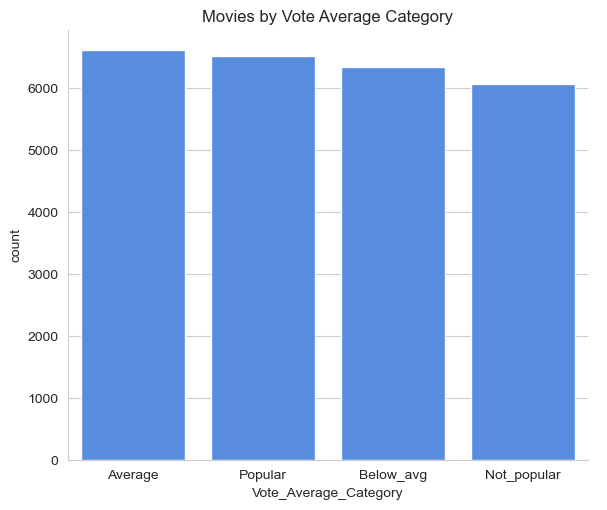

In [125]:

sns.catplot(x ='Vote_Average_Category' , data = df, kind = 'count' , order = df['Vote_Average_Category'].value_counts().index , color = '#4287f5', height=5, aspect=1.2)
plt.title('Movies by Vote Average Category')
plt.show()



# Most movies fall in the Average and Popular categories of vote ratings, with only a few in Not_popular. The top-rated movie in the dataset is `Kung Fu Master Huo Yuanjia` with a perfect score of `10`

# 3) What movie got the highest popularity? what's its genre?

In [126]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Original_Language,Genre,Vote_Average_Numeric,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,en,Action,8.3,Popular
1,2021,Spider-Man: No Way Home,5083.954,8940,en,Adventure,8.3,Popular
2,2021,Spider-Man: No Way Home,5083.954,8940,en,Science Fiction,8.3,Popular


# `Spider-Man: No Way Home` has the highest popularity rate in our dataset and it has Genre of `Action` ,`Adventure` and `Science Fiction`   

# 4) What movie got the lowest popularity? what's its genre?

In [128]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Original_Language,Genre,Vote_Average_Numeric,Vote_Average_Category
25546,2021,The United States vs. Billie Holiday,13.354,152,en,Music,6.7,Average
25547,2021,The United States vs. Billie Holiday,13.354,152,en,Drama,6.7,Average
25548,2021,The United States vs. Billie Holiday,13.354,152,en,History,6.7,Average
25549,1984,Threads,13.354,186,en,War,7.8,Popular
25550,1984,Threads,13.354,186,en,Drama,7.8,Popular
25551,1984,Threads,13.354,186,en,Science Fiction,7.8,Popular


# # `Threads` and `The United States vs. Billie Holiday` has the lowest popularity rate in our dataset and it has Genre of `War` ,`Drama` , `Science Fiction` , `History` and `Music`   

# 5) Which year has the most filmmed movies? 

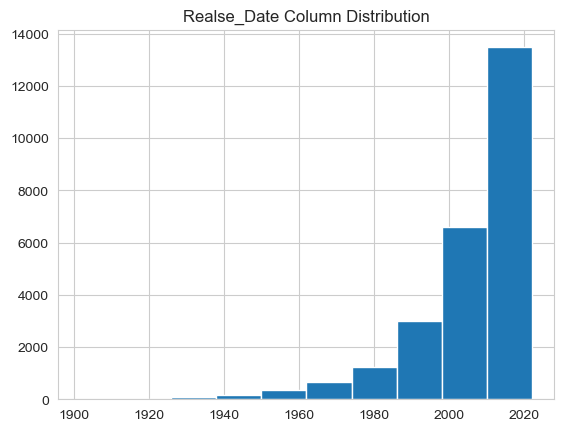

In [129]:
df['Release_Date'].hist()
plt.title('Realse_Date Column Distribution')
plt.show()

# Year 2020 has the highest filming rate in our dataset 

# 6) Which language has the most movies?


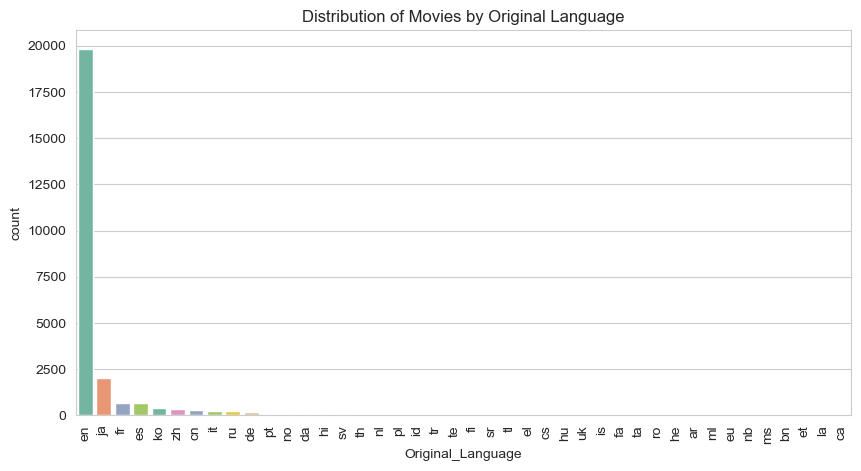

In [135]:
plt.figure(figsize=(10,5))
sns.countplot(x='Original_Language', data=df, order=df['Original_Language'].value_counts().index, hue='Original_Language',    
    legend=False,palette="Set2")
plt.title("Distribution of Movies by Original Language")
plt.xticks(rotation=90)
plt.show()

# Most movies are produced in English, followed by a few other languages, while many languages have very few films represented in the dataset

# 7) What is the average vote rating across all movies?


In [136]:
avg_vote  = df['Vote_Average_Numeric'].mean()
print("Average Vote Rating:", avg_vote)


Average Vote Rating: 6.536826862867877


# “The average vote rating across all movies is around 6.536, showing that most films fall near the mid-to-good rating range.”

# 8) What genre has the highest average rating? 

In [142]:
genre_avg_rating = df.groupby('Genre')['Vote_Average_Numeric'].mean().sort_values(ascending=False)
print("Genre with highest average rating:")
print(genre_avg_rating.head())

Genre with highest average rating:
Genre
Documentary    7.057635
History        6.981925
Music          6.973883
War            6.971336
Animation      6.908976
Name: Vote_Average_Numeric, dtype: float64


# The genre with the highest average rating is `7.05` , indicating that audiences rate films of this genre more favorably than others

# 9) Which movie has the maximum vote count?

In [145]:
max_vote_movie = df.loc[df['Vote_Count'].idxmax(), ['Title', 'Genre', 'Vote_Count']]
print("Movie with maximum vote count:")
print(max_vote_movie)



Movie with maximum vote count:
Title         Inception
Genre            Action
Vote_Count        31077
Name: 1072, dtype: object


# The movie with the maximum vote count is `Inception` with `31077` votes, indicating it is the most reviewed and likely widely watched movie in our dataset.

# 10) What is the trend of movie releases over the years (increasing or decreasing)


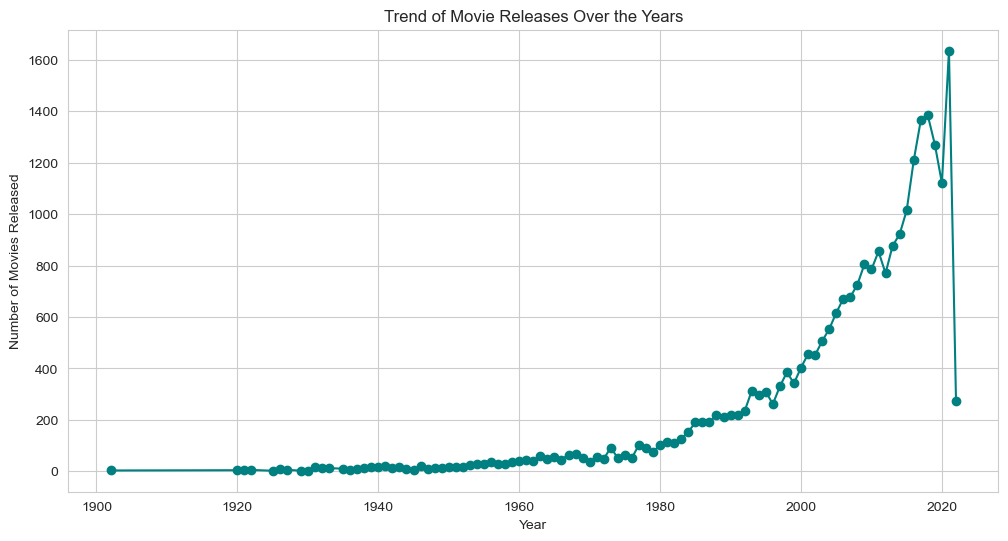

In [147]:
plt.figure(figsize=(12,6))
df['Release_Date'].value_counts().sort_index().plot(kind='line', marker='o', color='teal')
plt.title('Trend of Movie Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.grid(True)
plt.show()


# Movie releases have shown an overall increasing trend over the years, with the highest surge in the 2010s, indicating growing film production in recent decades.